In [4]:
!rm libdevice.10.bc
!ln -s /opt/conda/nvvm/libdevice/libdevice.10.bc ./libdevice.10.bc

# RANDOM SEED = 42
import numpy as np
import random

def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
set_seeds(42)

In [5]:
# LOAD DATASET

import boto3

bucket_name = 'mri-patches-nogroundtruths'
object_key = 'MRI_patches_combined.npz'
download_path = './MRI_patches_combined.npz'

s3 = boto3.client('s3')
s3.download_file(bucket_name, object_key, download_path)

print("Downloaded MRI_patches_combined.npz")

data = np.load('MRI_patches_combined.npz')
patches = data['patches']
labels = data['labels']

print("Label distribution:", np.bincount(labels))

# SPLIT INTO TRAINING & TESTING DATA

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Reshape patches to include channel dimension (grayscale = 1)
patches = patches[..., np.newaxis]  # (N, 32, 32) → (N, 32, 32, 1)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    patches, labels, test_size=0.15, random_state=42, stratify=labels
)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)

Downloaded MRI_patches_combined.npz
Label distribution: [132235   2165]
Training set: (114240, 32, 32, 1) (114240,)
Validation set: (20160, 32, 32, 1) (20160,)


In [3]:
# from sklearn.utils import class_weight
# import os

# # Compute class weights for training labels only
# class_weights = class_weight.compute_class_weight(
#     class_weight='balanced',
#     classes=np.unique(y_train_int),
#     y=y_train_int
# )

# class_weights_dict = dict(enumerate(class_weights))
# print("Computed class weights:", class_weights_dict)

Computed class weights: {0: 0.5081850533807829, 1: 31.043478260869566}


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ constrained_conv    │ (None, 32, 32, 1) │         25 │ input_layer_3[0]… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 32, 32,    │        640 │ constrained_conv… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_24      │ (None, 32, 32,    │          0 │ conv2d_24[0][0]   │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 32, 32,    │     36,928 │ leaky_re_lu_24[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 32, 32,    │        128 │ constrained_conv… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_9 (Add)         │ (None, 32, 32,    │          0 │ conv2d_25[0][0],  │
│                     │ 64)               │            │ conv2d_26[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_25      │ (None, 32, 32,    │          0 │ add_9[0][0]       │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 32, 32,    │          0 │ leaky_re_lu_25[0… │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 16, 16,    │          0 │ dropout_21[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 16, 16,    │     73,856 │ max_pooling2d_15… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_26      │ (None, 16, 16,    │          0 │ conv2d_27[0][0]   │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 16, 16,    │    147,584 │ leaky_re_lu_26[0… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 16, 16,    │      8,320 │ max_pooling2d_15… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_10 (Add)        │ (None, 16, 16,    │          0 │ conv2d_28[0][0],  │
│                     │ 128)              │            │ conv2d_29[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_27      │ (None, 16, 16,    │          0 │ add_10[0][0]      │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 16, 16,    │          0 │ leaky_re_lu_27[0

 Total params: 456,397 (1.74 MB)

 Trainable params: 456,141 (1.74 MB)

 Non-trainable params: 256 (1.00 KB)

Stage 1: Training with Binary Crossentropy (Epochs 1–5)
Epoch 1/5
1784/1785 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8723 - auc: 0.9134 - loss: 0.3514 - precision: 0.8331 - recall: 0.9401
Epoch 1: val_recall improved from -inf to 0.41538, saving model to MRI_CCNN_model.h5


1785/1785 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8724 - auc: 0.9135 - loss: 0.3513 - precision: 0.8332 - recall: 0.9401 - val_accuracy: 0.9773 - val_auc: 0.9483 - val_loss: 0.0686 - val_precision: 0.3350 - val_recall: 0.4154
Epoch 2/5
1781/1785 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9524 - auc: 0.9767 - loss: 0.1559 - precision: 0.9288 - recall: 0.9798
Epoch 2: val_recall improved from 0.41538 to 0.53846, saving model to MRI_CCNN_model.h5


1785/1785 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9524 - auc: 0.9768 - loss: 0.1559 - precision: 0.9288 - recall: 0.9798 - val_accuracy: 0.9749 - val_auc: 0.9422 - val_loss: 0.0757 - val_precision: 0.3289 - val_recall: 0.5385
Epoch 3/5
1781/1785 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9624 - auc: 0.9819 - loss: 0.1303 - precision: 0.9413 - recall: 0.9864
Epoch 3: val_recall improved from 0.53846 to 0.81231, saving model to MRI_CCNN_model.h5


1785/1785 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9625 - auc: 0.9820 - loss: 0.1302 - precision: 0.9413 - recall: 0.9864 - val_accuracy: 0.9577 - val_auc: 0.9609 - val_loss: 0.1156 - val_precision: 0.2502 - val_recall: 0.8123
Epoch 4/5
1782/1785 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9704 - auc: 0.9854 - loss: 0.1098 - precision: 0.9525 - recall: 0.9902
Epoch 4: val_recall did not improve from 0.81231
1785/1785 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9704 - auc: 0.9854 - loss: 0.1098 - precision: 0.9525 - recall: 0.9902 - val_accuracy: 0.9756 - val_auc: 0.9343 - val_loss: 0.0805 - val_precision: 0.3440 - val_recall: 0.5631
Epoch 5/5
1783/1785 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9744 - auc: 0.9881 - loss: 0.0973 - precision: 0.9590 - recall: 0.9911
Epoch 5: val_recall did not improve from 0.81231
1785/1785 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9744 - auc: 0.9881 - loss: 0.0973 - precision: 0.9590 - recall: 0.9911 - val_accuracy: 0.9771 -

1785/1785 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.9699 - auc: 0.9857 - loss: 0.1208 - precision: 0.9519 - recall: 0.9898 - val_accuracy: 0.9564 - val_auc: 0.9447 - val_loss: 0.1562 - val_precision: 0.2477 - val_recall: 0.8369
Epoch 2/15
1782/1785 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9750 - auc: 0.9875 - loss: 0.1095 - precision: 0.9600 - recall: 0.9913
Epoch 2: val_recall did not improve from 0.83692
1785/1785 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9750 - auc: 0.9875 - loss: 0.1095 - precision: 0.9601 - recall: 0.9913 - val_accuracy: 0.9683 - val_auc: 0.9126 - val_loss: 0.1227 - val_precision: 0.2929 - val_recall: 0.6831
Epoch 3/15
1782/1785 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9788 - auc: 0.9901 - loss: 0.1033 - precision: 0.9659 - recall: 0.9927
Epoch 3: val_recall did not improve from 0.83692
1785/1785 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9789 - auc: 0.9901 - loss: 0.1033 - precision: 0.9659 - recall: 0.9927 - val_accuracy: 0.9651

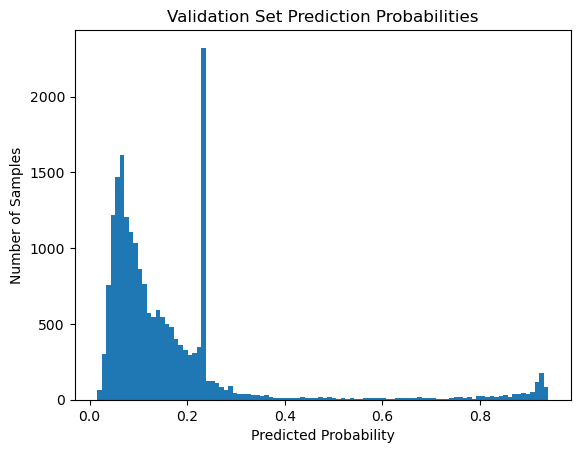

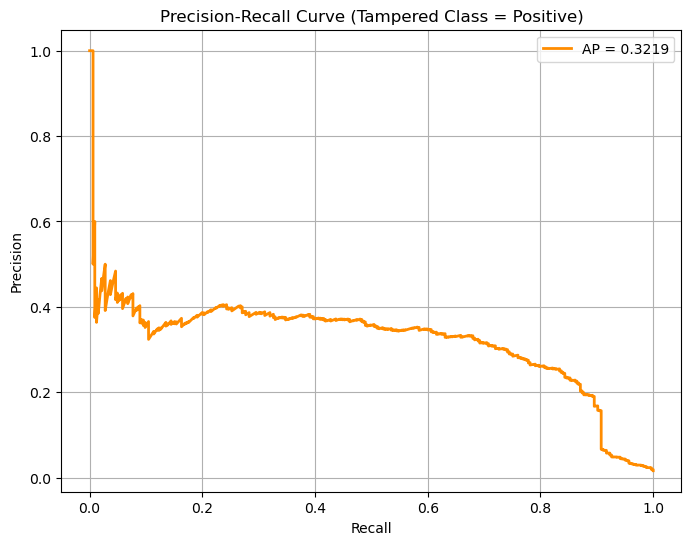

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Conv2D, Input, Dense, BatchNormalization, 
                                     MaxPooling2D, Dropout, Add, LeakyReLU, 
                                     GlobalAveragePooling2D, Reshape, multiply, 
                                     GlobalMaxPooling2D, Concatenate, Lambda, Activation)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.constraints import Constraint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras import backend as K

# SETTINGS

PATCH_FOLDER = './MRI_patches'
PATCH_SIZE = 32
BATCH_SIZE = 64  
EPOCHS = 20
LEARNING_RATE = 1e-4
MODEL_PATH = 'MRI_CCNN_model.h5'
VALIDATION_SPLIT = 0.15
L2_REG = 1e-5

# LOSS FUNCTIONS

def focal_loss(gamma=2., alpha=0.5): 
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * K.log(y_pred) - (1 - y_true) * K.log(1 - y_pred)
        weight = alpha * y_true * K.pow(1 - y_pred, gamma) + \
                 (1 - alpha) * (1 - y_true) * K.pow(y_pred, gamma)
        return K.mean(weight * cross_entropy, axis=-1)
    return focal_loss_fixed

def hybrid_loss_with_smoothed_bce(gamma=2.0, alpha=0.55, bce_weight=0.5, smoothing=0.05):
    # Focal loss (no smoothing)
    fl = focal_loss(gamma=gamma, alpha=alpha)
    # Smoothed BCE
    bce = tf.keras.losses.BinaryCrossentropy(label_smoothing=smoothing)

    def loss_fn(y_true, y_pred):
        return bce_weight * bce(y_true, y_pred) + (1 - bce_weight) * fl(y_true, y_pred)

    return loss_fn

# ZERO-SUM HIGH PASS FILTER

class zero_sum_filter(Constraint):
    def __call__(self, w):
        import tensorflow as tf
        w_shape = w.shape
        center = w_shape[0] // 2, w_shape[1] // 2
        mask = tf.ones_like(w)
        mask = tf.tensor_scatter_nd_update(mask, [[center[0], center[1], 0, 0]], [0.])
        w_sum = tf.reduce_sum(w * mask)
        w_center = -w_sum
        w = tf.tensor_scatter_nd_update(w, [[center[0], center[1], 0, 0]], [w_center])
        return w

# CBAM BLOCK

def cbam_block(x, ratio=8):
    channel = x.shape[-1]

    # Channel attention
    avg_pool = GlobalAveragePooling2D()(x)
    max_pool = GlobalMaxPooling2D()(x)

    shared_dense = Dense(channel // ratio, activation='relu', kernel_regularizer=l2(L2_REG))
    shared_out = Dense(channel, kernel_regularizer=l2(L2_REG))

    avg_out = shared_out(shared_dense(avg_pool))
    max_out = shared_out(shared_dense(max_pool))
    channel_attention = Add()([avg_out, max_out])
    channel_attention = Activation('sigmoid')(channel_attention)
    channel_attention = Reshape((1, 1, channel))(channel_attention)
    x = multiply([x, channel_attention])

    # Spatial attention
    avg_pool_spatial = Lambda(lambda t: K.mean(t, axis=3, keepdims=True))(x)
    max_pool_spatial = Lambda(lambda t: K.max(t, axis=3, keepdims=True))(x)
    concat = Concatenate(axis=-1)([avg_pool_spatial, max_pool_spatial])
    spatial_attention = Conv2D(1, (7, 7), padding='same', activation='sigmoid',
                               kernel_regularizer=l2(L2_REG))(concat)
    x = multiply([x, spatial_attention])
    return x

# BUILD CCNN

def build_ccnn(input_shape=(32, 32, 1)):
    inputs = Input(shape=input_shape)

    x = Conv2D(1, (5, 5), padding='same',
               kernel_constraint=zero_sum_filter(),
               kernel_regularizer=l2(L2_REG),
               use_bias=False,
               name='constrained_conv')(inputs)

    # Residual block 1
    res = x
    x = Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(L2_REG))(res)
    x = LeakyReLU(negative_slope=0.1)(x)
    x = Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(L2_REG))(x)
    res = Conv2D(64, (1, 1), padding='same', kernel_regularizer=l2(L2_REG))(res)
    x = Add()([x, res])
    x = LeakyReLU(negative_slope=0.1)(x)
    x = Dropout(0.2)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Residual block 2
    res2 = x
    x = Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(L2_REG))(res2)
    x = LeakyReLU(negative_slope=0.1)(x)
    x = Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(L2_REG))(x)
    res2 = Conv2D(128, (1, 1), padding='same', kernel_regularizer=l2(L2_REG))(res2)
    x = Add()([x, res2])
    x = LeakyReLU(negative_slope=0.1)(x)
    x = Dropout(0.2)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Add CBAM
    x = cbam_block(x)

    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(L2_REG))(x)
    x = LeakyReLU(negative_slope=0.1)(x)
    x = Dropout(0.2)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = SeparableConv2D(128, (3, 3), padding='same',
                        depthwise_regularizer=l2(L2_REG),
                        pointwise_regularizer=l2(L2_REG))(x)
    x = LeakyReLU(negative_slope=0.1)(x)
    x = Dropout(0.2)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = SeparableConv2D(128, (3, 3), padding='same',
                        depthwise_regularizer=l2(L2_REG),
                        pointwise_regularizer=l2(L2_REG))(x)
    x = LeakyReLU(negative_slope=0.1)(x)
    x = Dropout(0.2)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = SeparableConv2D(128, (3, 3), padding='same',
                        depthwise_regularizer=l2(L2_REG),
                        pointwise_regularizer=l2(L2_REG))(x)
    x = LeakyReLU(negative_slope=0.1)(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(L2_REG))(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(L2_REG))(x)
    x = Dropout(0.4)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer=Adam(LEARNING_RATE),
        loss=hybrid_loss_with_smoothed_bce(gamma=2.0, alpha=0.55, bce_weight=0.5, smoothing=0.05),
        metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall'),          # 👈 forces val_recall
        AUC(name='auc')
        ]
    )
    
    return model

# CLASS BALANCE IN TRAINING

def balanced_batch_generator(tampered_X, tampered_y, untampered_X, untampered_y, batch_size):
    n = batch_size // 2

    tampered_indices = np.arange(len(tampered_X))
    untampered_indices = np.arange(len(untampered_X))

    while True:
        tampered_sample_idx = np.random.choice(tampered_indices, size=n, replace=True)
        untampered_sample_idx = np.random.choice(untampered_indices, size=n, replace=False)

        batch_X = np.concatenate([tampered_X[tampered_sample_idx], untampered_X[untampered_sample_idx]], axis=0)
        batch_y = np.concatenate([tampered_y[tampered_sample_idx], untampered_y[untampered_sample_idx]], axis=0)

        perm = np.random.permutation(len(batch_y))
        yield batch_X[perm], batch_y[perm]

# SPLIT TRAINING DATA BY LABEL

tampered_mask = (y_train == 1)
untampered_mask = (y_train == 0)

tampered_X_train = X_train[tampered_mask]
tampered_y_train = y_train[tampered_mask]
untampered_X_train = X_train[untampered_mask]
untampered_y_train = y_train[untampered_mask]

# COMPILE CCNN

model = build_ccnn()
model.summary()

# UPDATE CCNN & EARLY STOPPING

checkpoint = ModelCheckpoint(
    MODEL_PATH,
    monitor='val_recall',
    mode='max',
    save_best_only=True,
    verbose=1
)

earlystop = EarlyStopping(
    monitor='val_recall',
    mode='max',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# GENERATE TRAINING BATCHES

train_generator = balanced_batch_generator(
    tampered_X_train, tampered_y_train,
    untampered_X_train, untampered_y_train,
    batch_size=BATCH_SIZE
)

steps_per_epoch = len(y_train) // BATCH_SIZE

# TRAIN CCNN

# Define BCE and hybrid loss separately
bce_loss = tf.keras.losses.BinaryCrossentropy()
hybrid = hybrid_loss_with_smoothed_bce(gamma=2.0, alpha=0.55, bce_weight=0.5, smoothing=0.05)

# Stage 1 (Epochs 1-5): Train with BCE
print("Stage 1: Training with Binary Crossentropy (Epochs 1–5)")
model.compile(
    optimizer=Adam(LEARNING_RATE),
    loss=bce_loss,
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall'),
        AUC(name='auc')
    ]
)

history_bce = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=5,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint, earlystop],
    shuffle=False
)

# Stage 2 (Epochs 6-Stop): Train with Hybrid Loss
print("Stage 2: Training with Hybrid Loss (Epochs 6–20)")
model.compile(
    optimizer=Adam(LEARNING_RATE),
    loss=hybrid,
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall'),
        AUC(name='auc')
    ]
)

history_hybrid = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS - 5,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint, earlystop],
    shuffle=False
)

# THRESHOLD EVALUATION

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, average_precision_score

y_val_probs = model.predict(X_val)

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
for thresh in thresholds:
    y_val_pred = (y_val_probs > thresh).astype(int)
    print(f"--- Threshold: {thresh} ---")
    print(classification_report(y_val, y_val_pred, digits=4))
    print(f"AUROC (using probs): {roc_auc_score(y_val, y_val_probs):.4f}\n")

# PROBABILITY VS. NUMBER OF SAMPLES GRAPH

plt.hist(y_val_probs, bins=100)
plt.title("Validation Set Prediction Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Number of Samples")
plt.show()

# Get predicted probabilities
y_scores = y_val_probs.ravel() 

# PRECISION VS. RECALL GRAPH

# Compute PR curve & area under PR curve
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)
avg_precision = average_precision_score(y_val, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AP = {avg_precision:.4f}", color="darkorange", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Tampered Class = Positive)")
plt.grid(True)
plt.legend(loc="upper right")
plt.show()